In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [2]:
import keras
import numpy as np
import pandas as pd
import io
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras import regularizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
data = pd.read_csv(io.StringIO(uploaded['Churn_Modelling.csv'].decode('utf-8')))


In [0]:
#Converting Geography into matrix

lb = preprocessing.LabelBinarizer() #Calling the label binarizer function

lb.fit(data['Geography']) #Fitting it to the column for categorical data. 
geo_transformed = lb.transform(data['Geography']) #Applying the transform to the column
geo_lb = pd.DataFrame(data = geo_transformed, columns = lb.classes_) #Creating a new DF with transformed values

In [0]:
#Converting Gender to matrix

a = data.iloc[:,5]
b = np.where(a=='Male',1,0)
c = np.where(a=='Female',1,0)

m_df = pd.DataFrame(data = b, columns = ['Male'])
f_df = pd.DataFrame(data = c, columns = ['Female'])

gen_df = pd.concat([m_df,f_df], axis=1)

In [6]:
#Final DF

main_df = pd.concat([data, geo_lb, gen_df], axis =1)
y = data.iloc[:,13]
main_df.drop(labels=['Gender','Geography','RowNumber','CustomerId','Surname','Exited'],axis=1, inplace=True)

print(main_df.shape)
print(y.shape)

(10000, 13)
(10000,)


In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(main_df, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
model = Sequential()
model.add(Dense(64, input_dim = 13, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
model.add(Dense(10, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# model.add(Dense(128,input_dim=13, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
# model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dense(output_dim=1, kernel_initializer='uniform', activation = 'sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.fit(X_train,y_train.values,nb_epoch=100, batch_size=10, verbose=2, shuffle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.5096 - acc: 0.7895
Epoch 2/100
 - 1s - loss: 0.4555 - acc: 0.7960
Epoch 3/100
 - 1s - loss: 0.4439 - acc: 0.7960
Epoch 4/100
 - 1s - loss: 0.4351 - acc: 0.7960
Epoch 5/100
 - 1s - loss: 0.4288 - acc: 0.7960
Epoch 6/100
 - 1s - loss: 0.4240 - acc: 0.7960
Epoch 7/100
 - 1s - loss: 0.4202 - acc: 0.7960
Epoch 8/100
 - 1s - loss: 0.4125 - acc: 0.8192
Epoch 9/100
 - 1s - loss: 0.4000 - acc: 0.8427
Epoch 10/100
 - 1s - loss: 0.3853 - acc: 0.8516
Epoch 11/100
 - 1s - loss: 0.3716 - acc: 0.8580
Epoch 12/100
 - 1s - loss: 0.3634 - acc: 0.8595
Epoch 13/100
 - 1s - loss: 0.3591 - acc: 0.8617
Epoch 14/100
 - 1s - loss: 0.3569 - acc: 0.8616
Epoch 15/100
 - 1s - loss: 0.3535 - acc: 0.8634
Epoch 16/100
 - 1s - loss: 0.3520 - acc: 0.8619
Epoch 17/100
 - 1s - loss: 0.3513 - acc: 0.8632
Epoch 18/100
 - 1s - loss: 0.3492 - acc: 0.8609
Epoch 19/100
 - 1s - loss: 0.3475 - acc: 0.8624
Epoch 20/100
 - 1s - loss: 0.3462 - acc: 0.8610
E

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,607
Trainable params: 1,607
Non-trainable params: 0
_________________________________________________________________


In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1475,  120],
       [ 184,  221]])

In [12]:
accuracy = (1482+231)/(1482+113+174+231)
accuracy

0.8565

In [13]:
# # # # summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1595
           1       0.65      0.55      0.59       405

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [14]:
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8000/8000 [==============================] - 0s 23us/step

acc: 87.22%


In [0]:
#As we can see the accuracy is good but the F score is poor. This is because the class is not balanced. We only have:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


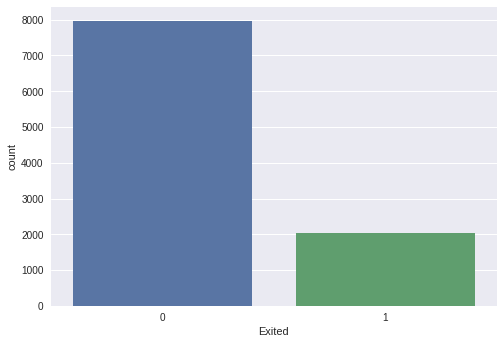

In [16]:
import seaborn as sns
sns.countplot(data.Exited)

In [17]:
a = data[data.Exited == 1]
a
print(a.shape)


(2037, 14)


In [18]:
b = data[data.Exited == 0]
print(b.shape)

(7963, 14)


In [0]:
from sklearn.utils import resample

df_majority_downsampled = resample(b,replace=False,n_samples=2037,random_state=123)

In [20]:
df_downsampled = pd.concat([df_majority_downsampled,a])

df_downsampled.Exited.value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


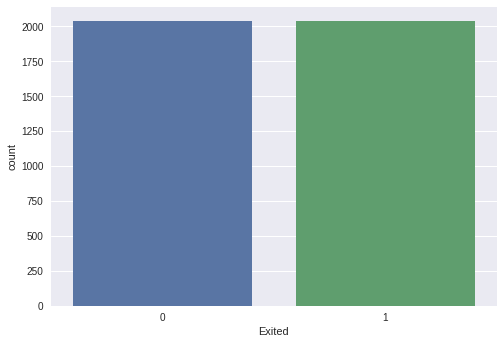

In [21]:
sns.countplot(df_downsampled.Exited)

In [22]:
df_downsampled

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1183,1184,15600992,Madukaego,652,France,Male,36,1,0.00,2,1,1,151314.98,0
4245,4246,15569446,Tu,732,France,Female,34,8,122338.43,2,1,0,187985.85,0
2164,2165,15794479,Becker,767,Spain,Male,77,8,149083.70,1,1,1,190146.83,0
6301,6302,15683183,Volkova,766,Germany,Female,45,6,97652.96,1,1,0,127332.33,0
4740,4741,15618661,Chidubem,535,France,Male,30,6,103804.97,1,1,1,125710.53,0
5441,5442,15602979,Lin,751,France,Male,29,1,135536.50,1,1,0,66825.33,0
9623,9624,15796790,Amaechi,573,France,Female,47,8,154543.98,1,1,0,29586.73,0
561,562,15800440,Power,650,Spain,Male,61,1,152968.73,1,0,1,82970.69,0
1229,1230,15607598,Muravyov,575,Spain,Female,31,6,0.00,2,1,1,95686.42,0
6127,6128,15708693,Sherman,759,France,Female,33,2,0.00,2,1,0,56583.88,0


In [24]:
#Converting Geography into matrix

onehotencoder=OneHotEncoder()
le = preprocessing.LabelEncoder()

df_downsampled['Geography'] = le.fit_transform(df_downsampled['Geography'])
var2 = onehotencoder.fit_transform(df_downsampled[['Geography']])

df_downsampled['Spain'] = np.where(var2.A[:,0] ==1,1,0)
df_downsampled['Germany'] = np.where(var2.A[:,1] ==1,1,0)
df_downsampled['France'] = np.where(var2.A[:,2] ==1,1,0)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [25]:
#Converting Gender into matrix


df_downsampled['Gender']=le.fit_transform(df_downsampled['Gender'])

var1 = onehotencoder.fit_transform(df_downsampled[['Gender']])

print(type(var1.A))

print(len(var1.A[:,1]))

df_downsampled['Female'] = np.where(var1.A[:,0] ==0,0,1)
df_downsampled['Male'] = np.where(var1.A[:,1] ==1,1,0)

<class 'numpy.ndarray'>
4074


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
new_df = df_downsampled.copy()


In [27]:
y = new_df.iloc[:,13]
y
print(y.shape)

new_df.drop(labels=['Gender','Geography','RowNumber','CustomerId','Surname','Exited'],axis=1, inplace=True)
print(new_df.shape)

(4074,)
(4074, 13)


In [28]:
new_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Spain,Germany,France,Female,Male
1183,652,36,1,0.00,2,1,1,151314.98,1,0,0,0,1
4245,732,34,8,122338.43,2,1,0,187985.85,1,0,0,1,0
2164,767,77,8,149083.70,1,1,1,190146.83,0,0,1,0,1
6301,766,45,6,97652.96,1,1,0,127332.33,0,1,0,1,0
4740,535,30,6,103804.97,1,1,1,125710.53,1,0,0,0,1
5441,751,29,1,135536.50,1,1,0,66825.33,1,0,0,0,1
9623,573,47,8,154543.98,1,1,0,29586.73,1,0,0,1,0
561,650,61,1,152968.73,1,0,1,82970.69,0,0,1,0,1
1229,575,31,6,0.00,2,1,1,95686.42,0,0,1,1,0
6127,759,33,2,0.00,2,1,0,56583.88,1,0,0,1,0


In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3259, 13)
(3259,)
(815, 13)
(815,)


In [0]:
model = Sequential()
model.add(Dense(64, input_dim = 13, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
model.add(Dense(10, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train.values,nb_epoch=100, batch_size=10, verbose=2, shuffle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
 - 1s - loss: 0.6822 - acc: 0.5775
Epoch 2/100
 - 0s - loss: 0.6182 - acc: 0.7106
Epoch 3/100
 - 0s - loss: 0.5951 - acc: 0.7091
Epoch 4/100
 - 0s - loss: 0.5863 - acc: 0.7110
Epoch 5/100
 - 0s - loss: 0.5795 - acc: 0.7159
Epoch 6/100
 - 0s - loss: 0.5705 - acc: 0.7214
Epoch 7/100
 - 0s - loss: 0.5589 - acc: 0.7272
Epoch 8/100
 - 0s - loss: 0.5441 - acc: 0.7361
Epoch 9/100
 - 0s - loss: 0.5312 - acc: 0.7447
Epoch 10/100
 - 0s - loss: 0.5175 - acc: 0.7548
Epoch 11/100
 - 0s - loss: 0.5088 - acc: 0.7567
Epoch 12/100
 - 0s - loss: 0.4994 - acc: 0.7656
Epoch 13/100
 - 0s - loss: 0.4952 - acc: 0.7600
Epoch 14/100
 - 0s - loss: 0.4885 - acc: 0.7597
Epoch 15/100
 - 0s - loss: 0.4868 - acc: 0.7643
Epoch 16/100
 - 0s - loss: 0.4828 - acc: 0.7634
Epoch 17/100
 - 0s - loss: 0.4789 - acc: 0.7699
Epoch 18/100
 - 0s - loss: 0.4753 - acc: 0.7745
Epoch 19/100
 - 0s - loss: 0.4722 - acc: 0.7653
Epoch 20/100
 - 0s - loss: 0.4731 - acc: 0.7720
Epoch 21/100
 - 0s - loss: 0.4686 - acc: 0.7748
E

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 1,607
Trainable params: 1,607
Non-trainable params: 0
_________________________________________________________________


In [34]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test,y_pred)
cm

array([[350,  61],
       [136, 268]])

In [35]:
accuracy = (342+300)/(342+300+69+104)
accuracy

0.7877300613496933

In [36]:
# # # # summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       411
           1       0.81      0.66      0.73       404

   micro avg       0.76      0.76      0.76       815
   macro avg       0.77      0.76      0.76       815
weighted avg       0.77      0.76      0.76       815



In [37]:
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3259/3259 [==============================] - 0s 44us/step

acc: 79.66%


In [38]:
scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

815/815 [==============================] - 0s 31us/step

acc: 75.83%


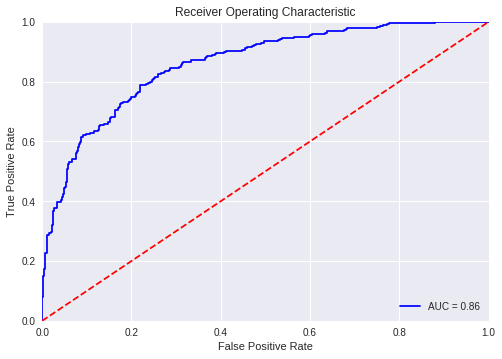

In [48]:
import matplotlib.pyplot as plt
probs = model.predict_proba(X_test)
preds = probs[:]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
roc_auc

0.8601334586013345